In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors 
import matplotlib as mpl
from stop_words import get_stop_words 
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_csv('original_beeks.csv')
df.head()

,Title,Author,Narrator,Language,Duration,Rate,Summary
0,"Ayurvedic Self-Care Handbook, The",Dr. Suhas Kshirsagar Sarah Kucera,Sarah Kucera,Ingl̩s,7h 05m 33s,(0 calificaciones),"Feeling burned out, unmotivated, or stuck? The..."
1,Ayurveda for Modern Life,Emin̩ Kali Rushton,Stina Nielsen,Ingl̩s,6h 42m 23s,(0 calificaciones),Health journalist and skeptic Emin̩ Kali Rusht...
2,7 Secrets to Investing Like Warren Buffett,Sean Seah Mary Buffett,Matthew Lloyd Davies Pamela Almand,Ingl̩s,3h 21m 22s,(0 calificaciones),"A clear, simple, and complete guide for beginn..."
3,68,Paco Ignacio Taibo II,Pedro de Aguill�_n Jr.,Espa̱ol,2h 53m 42s,(3 calificaciones),"El movimiento estudiantil del 68, nadie lo dud..."
4,5 velocidades��_ Beek te explica,Steve Cockram Jeremie Kubicek,Mayra Tejeda,Espa̱ol,23m 49s,(14 calificaciones),Beek te explica: 5 velocidades de Jeremie Kubi...


In [ ]:
df.Summary = df.Summary.str.encode('utf-8')


In [ ]:
beek_df = df.copy(deep=True)
beek_df.head()

,Title,Author,Narrator,Language,Duration,Rate,Summary
0,"Ayurvedic Self-Care Handbook, The",Dr. Suhas Kshirsagar Sarah Kucera,Sarah Kucera,Ingl̩s,7h 05m 33s,(0 calificaciones),"Feeling burned out, unmotivated, or stuck? The..."
1,Ayurveda for Modern Life,Emin̩ Kali Rushton,Stina Nielsen,Ingl̩s,6h 42m 23s,(0 calificaciones),Health journalist and skeptic Emin̩ Kali Rusht...
2,7 Secrets to Investing Like Warren Buffett,Sean Seah Mary Buffett,Matthew Lloyd Davies Pamela Almand,Ingl̩s,3h 21m 22s,(0 calificaciones),"A clear, simple, and complete guide for beginn..."
3,68,Paco Ignacio Taibo II,Pedro de Aguill�_n Jr.,Espa̱ol,2h 53m 42s,(3 calificaciones),"El movimiento estudiantil del 68, nadie lo dud..."
4,5 velocidades��_ Beek te explica,Steve Cockram Jeremie Kubicek,Mayra Tejeda,Espa̱ol,23m 49s,(14 calificaciones),Beek te explica: 5 velocidades de Jeremie Kubi...


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4251 entries, 0 to 4250
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     4251 non-null   object
 1   Author    4235 non-null   object
 2   Narrator  4137 non-null   object
 3   Language  4206 non-null   object
 4   Duration  4251 non-null   object
 5   Rate      4251 non-null   object
 6   Summary   4251 non-null   object
dtypes: object(7)
memory usage: 232.6+ KB


In [ ]:
beek_df.convert_dtypes().dtypes

Title       string
Author      string
Narrator    string
Language    string
Duration    string
Rate        string
Summary     string
dtype: object

In [ ]:
beek_df.isnull().sum()

Title         0
Author       16
Narrator    114
Language     45
Duration      0
Rate          0
Summary       0
dtype: int64

In [ ]:
text = beek_df['Summary'][0]
text

'Feeling burned out, unmotivated, or stuck? The Ayurvedic Self-Care Handbook is here to help. This authoritative guide to ancient healing offers more than 100 daily and seasonal Ayurvedic rituals&mdash;each taking 10 minutes or less&mdash;to reconnect you with nature�۪s rhythms, and to unlock better health, as you:Boost and stabilize your energy with yogic breathingOvercome transitions with grounding meditationsUndo physical and emotional stress with personalized yoga posturesPrevent and treat disease with nourishing tonics and teasPause and reflect with daily and weekly journaling promptsGet back in sync with nature&mdash;and rediscover your potential to feel good.'

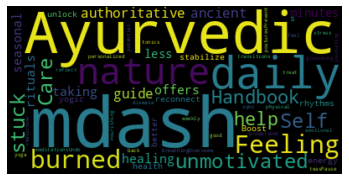

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

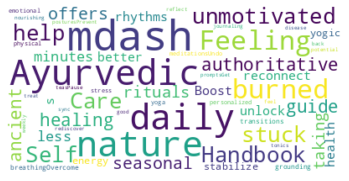

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# Save the image in the img folder:
wordcloud.to_file("img/first_review.png")

In [ ]:
summaries = " ".join(summary for summary in df.Summary)
print ("There are {} words in the combination of all summaries.".format(len(summaries)))

There are 4455714 words in the combination of all summaries.


In [ ]:
stop_words_en = get_stop_words('en')
stop_words_es = get_stop_words('es')
stopwords = ['I','vida','libro','s','un',"the", "in", "las", "los", "el", 'de', 'la', 'y', 'm', 'que', 'como','en','se','es','mdash','qu','_','mdash','cmo','c','mo','_mo'] + stop_words_en + stop_words_es
#stopwords.update(['s','un',"the", "in", "las", "los", "el", 'de', 'la', 'y', 'm', 'que', 'como','en','se','es'])

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(summaries)

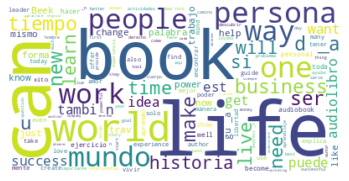

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Save the image in the img folder:
wordcloud.to_file("img/all_summaries.png")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8259d06c-b693-44c8-803f-9c293c51004e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>